In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Prepare dataset where users are entity & books are features
### Read ratings data


In [2]:
ratings = pd.read_csv("data/ratings.csv")
n_users = ratings.user_id.unique().shape[0] # 53424 users
n_books = ratings.book_id.unique().shape[0] # 10000 books

In [3]:
ratings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [4]:
print("The database contains ratings from", n_users, "users for", n_books, "books.")

The database contains ratings from 53424 users for 10000 books.


### Ceate user-book matrix of ratings

In [5]:
data_matrix = np.zeros((n_users, n_books))
for line in ratings.itertuples():
    # equivalent to user_id as row, book_id as col, ratings as values in the matrix
    data_matrix[line[2]-1, line[1]-1] = line[3]
# print(type(data_matrix))

### Explore how many books each user rates

In [6]:
user_row = 23 # set user row here, this will serve as argument in method

In [7]:
    n_books_rated = 0
    for book in range(0, n_books):
        if data_matrix[user_row, book] != 0:
            n_books_rated += 1
    print(n_books_rated)

17


In [8]:
np.count_nonzero(data_matrix[user_row])

17

### Split users who rated more than 50 books, i.e. 0.5% of 10k, to be considered as "recommender"
### Calculate how many books each of all users rated

In [9]:
    books_rated = np.zeros(n_users)
    for user in range(0, n_users):
        books_rated[user] = np.count_nonzero(data_matrix[user])

(array([17765., 11285.,  5856.,  3906.,  2768.,  2074.,  2969.,  1893.,
         1253.,  1595.,   866.,  1194.]),
 array([  0,   5,  10,  15,  20,  25,  30,  40,  50,  60,  80, 100, 200]),
 <a list of 12 Patch objects>)

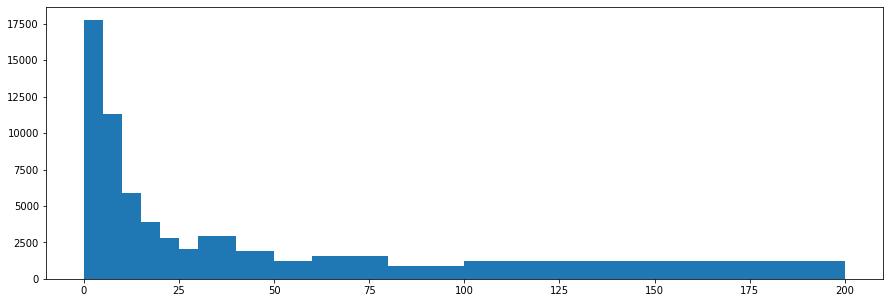

In [10]:
    plt.figure(figsize=(15,5))
    plt.hist(books_rated, bins = [0, 5, 10, 15, 20, 25, 30, 40, 50, 60, 80, 100, 200])

In [11]:
    recommender = []
    # recommendee = []
    for user in range(0, n_users):
        if np.count_nonzero(data_matrix[user]) > 50:
            recommender.append(data_matrix[user])
        # else:
            # recommendee.append(data_matrix[user])

In [12]:
    n_recommenders = len(recommender)
    # n_recommendees = len(recommendee)
    # print("split users to", n_recommenders, "recommenders and", n_recommendees, "recommendees")
    print("There are selected", n_recommenders, "users to be recommenders.")

There are selected 4767 users to be recommenders.


## Find cosine similarities between users

##### \begin{equation} cos(\pmb u, \pmb v) = \frac {\pmb u \cdot \pmb v}{||\pmb u|| \cdot ||\pmb v||} \end{equation}


### Calculate magnitude of vector

In [13]:
np.linalg.norm(recommender[0]) # in case of numpy array

33.689761055846034

In [14]:
def vector_magnitude(u):
    # u is 1d numpy array
    out = 0
    for j in range(1, len(u)):
        out += u[j]**2
    return math.sqrt(out)

In [15]:
vector_magnitude(recommender[0])

33.689761055846034

### Calculate dot product of two vectors

In [16]:
np.dot(recommender[2000], recommender[2000]) # in case of numpy array

887.0

In [17]:
def dot_product(u, v):
    out = 0
    for j in range(1, len(u)):
        out += u[j]*v[j]
    return out

In [18]:
dot_product(recommender[2000], recommender[2000])

887.0

### Calculate cosine similarity between two users, i.e. two vectors of each user ratings

In [19]:
def cos_similar(u, v):
    # return dot_product(u, v)/vector_magnitude(u)/vector_magnitude(v)
    ss_u = 0
    ss_v = 0
    enum = 0
    for j in range(1, len(u)):
        ss_u += (u[j]**2)
        ss_v += (v[j]**2)
        enum += u[j]*v[j]
    return enum/math.sqrt(ss_u)/math.sqrt(ss_v)

In [20]:
cos_similar(recommender[2000], recommender[2000]) # similarity of itself

0.9999999999999999

In [21]:
cos_similar(recommender[2000], recommender[2001]) # similarity to other

0.007188899706974858

### Find the k most similar recommenders of a given recommendee

In [22]:
user_row = 23 # set user row here

In [24]:
    similar = np.zeros(n_recommenders)
    for user in range(0, n_recommenders):
        similar[user] = cos_similar(data_matrix[user_row], recommender[user])

In [25]:
print("This user read", np.count_nonzero(data_matrix[user_row]), "books.")
print("There are", np.count_nonzero(similar), "users that read at least one same book as this user.")

This user read 17 books.
There are 349 users that read at least one same book as this user.


(array([  4.,  57., 119., 122.,  41.,   6.]),
 array([0.005, 0.01 , 0.02 , 0.03 , 0.05 , 0.1  , 1.   ]),
 <a list of 6 Patch objects>)

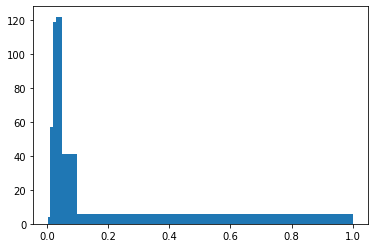

In [26]:
plt.hist(similar, bins = [0.005, 0.01, 0.02, 0.03, 0.05, 0.1, 1])

In [27]:
max(similar) # the highest cosine similarity

0.17501553461262695

In [28]:
most_similar = np.where(similar == max(similar))[0][0] # the index of the most similar user (recommenders)
print(most_similar)

3067


In [29]:
top_similar = np.where(similar > 0.1)[0] # top similar users
print(top_similar)

[  65  781 1685 2550 3067 3562]


In [30]:
print("The most similar users/recommenders read", np.count_nonzero(recommender[most_similar]), "books.")
for user in top_similar:
    if user != most_similar:
        print("Other similar users/recommenders read", np.count_nonzero(recommender[user]), "books.")

The most similar users/recommenders read 57 books.
Other similar users/recommenders read 64 books.
Other similar users/recommenders read 72 books.
Other similar users/recommenders read 72 books.
Other similar users/recommenders read 53 books.
Other similar users/recommenders read 52 books.


## Find books highly rated by similar users
### Explore book ratings by k most similar users/recommenders

(array([ 0.,  0.,  8., 21., 28.]),
 array([1, 2, 3, 4, 5, 6]),
 <a list of 5 Patch objects>)

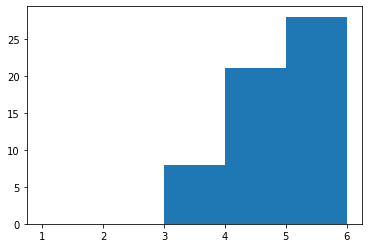

In [31]:
plt.hist(recommender[most_similar], bins = [1,2,3,4,5,6]) # still books with high ratings, still need to narrow down

### Average book ratings among top similar users

(array([48., 14.,  1.,  0.,  0.]),
 array([1, 2, 3, 4, 5, 6]),
 <a list of 5 Patch objects>)

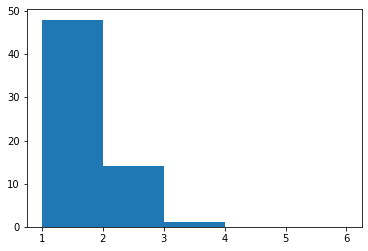

In [32]:
books_rating = np.zeros(n_books)
for user in top_similar:
    books_rating += recommender[user]/len(top_similar)
plt.hist(books_rating, bins = [1,2,3,4,5,6])

In [33]:
best_book = np.where(books_rating == max(books_rating))[0][0]
print(best_book)

3141


### Retain the highly rated books

In [71]:
good_book = np.where(books_rating > max(books_rating)/2.5)[0]
print(good_book, len(good_book))

[ 869  984 1445 1513 1600 2173 2174 2219 2294 2365 2650 3032 3141 3207
 3320 3387 3420 3471 3487 3518 3781 4283 4335 4503 4604 4659 4809 4938
 4982 5357 5377 5424 5436 5555 5753 5907 6437 6876 6995 7408 7768 8439
 8469 8695 8995 9301 9322 9909] 48


### Identify books which the user already read (to be removed from recommendation list)

In [72]:
read_book = np.where(data_matrix[user_row] != 0)[0]
print(read_book)

[2319 3141 3309 3487 4148 4604 4982 5326 6017 6172 6437 6534 6908 7261
 7408 7769 7867]


### Read books data to match with book id

In [73]:
    books = pd.read_csv("data/books.csv")
    books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [74]:
books.loc[books['id']==best_book]

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
3140,3141,6862,6862,933082,97,385494246,9.780385e+12,Ian McEwan,1998.0,Amsterdam,...,30469,34352,2553,1038,4225,13087,11759,4243,https://images.gr-assets.com/books/1403191209m...,https://images.gr-assets.com/books/1403191209s...


In [75]:
print("The user rated the following books:")
books.loc[books['id'].isin(read_book)]

The user rated the following books:


,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
2318,2319,5267365,5267365,5334682,49,1423116380,9.781423e+12,Ally Carter,2009.0,Don't Judge a Girl by Her Cover,...,55517,58508,2389,618,1784,9930,19190,26986,https://images.gr-assets.com/books/1359827132m...,https://images.gr-assets.com/books/1359827132s...
3140,3141,6862,6862,933082,97,385494246,9.780385e+12,Ian McEwan,1998.0,Amsterdam,...,30469,34352,2553,1038,4225,13087,11759,4243,https://images.gr-assets.com/books/1403191209m...,https://images.gr-assets.com/books/1403191209s...
3308,3309,7779059,7779059,10351697,17,045146365X,9.780451e+12,Jim Butcher,2010.0,Side Jobs: Stories From The Dresden Files,...,33738,37329,1680,69,515,5726,15346,15673,https://images.gr-assets.com/books/1269115846m...,https://images.gr-assets.com/books/1269115846s...
3486,3487,781046,781046,767067,26,670060291,9.780670e+12,Susane Colasanti,2006.0,When It Happens,...,32443,33534,1226,1092,3139,9215,9979,10109,https://images.gr-assets.com/books/1268350521m...,https://images.gr-assets.com/books/1268350521s...
4147,4148,72854,72854,3098033,27,553578529,9.780554e+12,Sara Donati,1998.0,Into the Wilderness,...,25293,27851,1751,544,1225,4589,9923,11570,https://images.gr-assets.com/books/1320395200m...,https://images.gr-assets.com/books/1320395200s...
4603,4604,16033909,16033909,21805191,50,425267083,9.780425e+12,Maya Banks,2013.0,Burn,...,30693,33900,1781,698,2078,6831,11018,13275,https://images.gr-assets.com/books/1359944814m...,https://images.gr-assets.com/books/1359944814s...
4981,4982,426625,426625,1167774,29,60542098,9.780061e+12,"Jane O'Connor, Robin Preiss Glasser",2005.0,Fancy Nancy,...,21619,21741,792,483,1079,3876,5647,10656,https://images.gr-assets.com/books/1376473636m...,https://images.gr-assets.com/books/1376473636s...
5325,5326,216377,216377,23607,74,679734465,9.780680e+12,Philip K. Dick,1981.0,Valis,...,17305,18949,1119,464,1201,4014,6574,6696,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
6016,6017,192892,192892,520581,61,61043583,9.780061e+12,Dorothy L. Sayers,1927.0,Unnatural Death,...,17742,18764,549,172,504,3705,7132,7251,https://images.gr-assets.com/books/1316244142m...,https://images.gr-assets.com/books/1316244142s...
6171,6172,3080212,3080212,3111256,29,399155279,9.780399e+12,John Sandford,2008.0,Heat Lightning,...,16507,18301,720,133,411,3057,7484,7216,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...


In [76]:
recommend_book = np.delete(good_book, np.where(np.isin(good_book, read_book)))

In [77]:
print("Recommended books for the users are:")
books.loc[books['id'].isin(recommend_book)]

Recommended books for the users are:


,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
868,869,2967752,2967752,1531887,127,1933372605,9.781933e+12,"Muriel Barbery, Alison Anderson",2006.0,L'élégance du hérisson,...,101669,118556,15335,6480,11258,25525,39331,35962,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
983,984,15997,15997,1031493,819,140424393,9.780140e+12,"John Milton, John Leonard",1667.0,Paradise Lost,...,96316,104580,2645,3956,9036,25069,32906,33613,https://images.gr-assets.com/books/1455618673m...,https://images.gr-assets.com/books/1455618673s...
1444,1445,331920,331920,3199878,45,375825444,9.780376e+12,Wendelin Van Draanen,2001.0,Flipped,...,79264,81706,6209,1175,4843,19570,28606,27512,https://images.gr-assets.com/books/1388554293m...,https://images.gr-assets.com/books/1388554293s...
1512,1513,7046495,7046495,7370233,46,451229851,9.780451e+12,J.R. Ward,2010.0,"Lover Avenged, part one",...,82824,90079,3872,616,1846,9925,25598,52094,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
1599,1600,220970,220970,1383273,96,515128635,9.780515e+12,Lee Child,1999.0,Tripwire,...,55251,67495,2692,348,1899,13129,29196,22923,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
2172,2173,16141924,16141924,21973739,16,385349068,9.780385e+12,Jim Gaffigan,2013.0,Dad Is Fat,...,40489,46767,6014,827,3199,13535,17973,11233,https://images.gr-assets.com/books/1354052742m...,https://images.gr-assets.com/books/1354052742s...
2173,2174,2279,2279,1732395,23,671869205,9.780672e+12,David McCullough,1992.0,Truman,...,53088,54704,1767,1869,2168,7817,17033,25817,https://images.gr-assets.com/books/1364681969m...,https://images.gr-assets.com/books/1364681969s...
2218,2219,5038,5038,2583229,48,765340747,9.780765e+12,Terry Goodkind,2001.0,The Pillars of Creation,...,43424,45832,751,2183,5064,11996,12852,13737,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
2293,2294,7137327,7137327,7400809,32,312650086,9.780313e+12,Ann Aguirre,2011.0,Enclave,...,55155,58102,4692,1642,3379,12548,20995,19538,https://images.gr-assets.com/books/1327877657m...,https://images.gr-assets.com/books/1327877657s...
2364,2365,261240,261240,1405544,98,1594561869,9.781595e+12,Edgar Allan Poe,1846.0,The Cask of Amontillado,...,48364,50207,924,413,1928,9964,18501,19401,https://images.gr-assets.com/books/1327936575m...,https://images.gr-assets.com/books/1327936575s...
